<a href="https://colab.research.google.com/github/sawubona-repo/PRIVAT/blob/main/Python_OIL_PRICE_TIMESERIES_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oil Price Time Series Analysis and Forecasting


---  
Data:
+ Weekly Oil Bulletin ([from European Commission](https://energy.ec.europa.eu/data-and-analysis/weekly-oil-bulletin_en))
+ Brent/WTi Crude Oil Spot Prices  ([from Datahub.io](https://datahub.io/core/oil-prices#resource-brent-week))
+ EUR/USD Echange Rate ([from Yahoo Finance](https://finance.yahoo.com/quote/EURUSD%3DX/history?period1=1104537600&period2=1688601600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true))
---  

Author:
+ dr. daniel benninger  

History:  
+ 2023-07-05 v1 dbe --- initial version   
---

## Load Libraries and Check Environment

In [1]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
print("pandas", pd.__version__)

pandas 1.5.3


In [3]:
%ls
%cd sample_data

sample_data/
/content/sample_data


In [4]:
import warnings
warnings.filterwarnings("ignore")

## Load Data and Verify Structure/Format/Values

In [5]:
# load the oil price dataset from the github repository
path = 'https://github.com/sawubona-repo/PRIVAT/raw/main/Oil-Price-Timeseries/eu-oil-price.csv'
data = pd.read_csv(path, delimiter=',', decimal='.')

In [6]:
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
0,2023-06-26,1724.62,1572.63,1053.04,699.13,538.56,708.63
1,2023-06-19,1725.76,1555.44,1049.65,703.58,553.15,712.28
2,2023-06-12,1729.09,1552.28,1046.34,688.93,553.54,717.69
3,2023-06-05,1715.95,1539.89,1038.93,696.23,549.51,723.13
4,2023-05-29,1719.03,1540.55,1048.49,697.58,544.09,723.61
5,2023-05-22,1705.46,1535.32,1045.63,686.37,543.19,729.15
6,2023-05-15,1703.43,1535.76,1043.86,688.42,512.07,735.16
7,2023-05-08,1709.49,1550.23,1026.45,701.33,520.41,739.10
8,2023-05-01,1732.90,1583.35,1034.12,708.54,558.59,738.61
9,2023-04-24,1744.21,1612.36,1095.41,710.80,555.80,743.69


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         916 non-null    object 
 1   Super95      916 non-null    float64
 2   Diesel       916 non-null    float64
 3   Heizoel      916 non-null    float64
 4   Heizoel-II   916 non-null    float64
 5   Heizoel-III  916 non-null    float64
 6   LPG          916 non-null    float64
dtypes: float64(6), object(1)
memory usage: 50.2+ KB


In [8]:
# convert date colume to "datetime" format
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)

In [9]:
data.describe()

,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1399.682806,1266.364520,805.299989,498.058319,398.807074,607.960186
std,186.122220,216.332723,211.215416,136.765623,112.970302,91.647353
min,998.210000,899.680000,479.920000,244.070000,169.950000,445.710000
25%,1267.432500,1101.107500,652.287500,384.195000,307.350000,538.197500
50%,1374.500000,1246.800000,763.270000,481.560000,381.950000,585.015000
75%,1526.072500,1383.490000,919.037500,614.730000,480.830000,682.067500
max,2035.900000,2035.240000,1728.020000,858.170000,730.960000,861.350000


In [10]:
data.sort_values(by='Date', inplace=True)
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16
910,2005-02-07,1055.29,907.27,497.52,262.91,191.08,491.14
909,2005-02-14,1050.71,903.49,497.08,260.46,197.77,489.45
908,2005-02-21,1053.09,906.69,501.93,261.44,197.32,481.76
907,2005-02-28,1058.98,923.79,526.72,269.18,201.57,484.73
906,2005-03-07,1067.73,941.34,553.90,274.74,205.71,486.66


---
## Select time range and plot time series
Select a specific timeframe

In [11]:
# dataS= data[(data['Date'] > "2019-01-01") & (data['Date'] < "2023-01-01")]
# dataS= data[(data['Date'] > "2018-01-01")]

In [12]:
# select selected variables
dataX = data
dataX = data[['Date', 'Super95','Diesel']]
dataX.head(10)

,Date,Super95,Diesel
915,2005-01-03,1018.75,909.06
914,2005-01-10,1015.24,901.38
913,2005-01-17,1026.21,899.68
912,2005-01-24,1027.07,900.77
911,2005-01-31,1047.13,909.60
910,2005-02-07,1055.29,907.27
909,2005-02-14,1050.71,903.49
908,2005-02-21,1053.09,906.69
907,2005-02-28,1058.98,923.79
906,2005-03-07,1067.73,941.34


and plot the time series as **line graphs** using *plotly.express*

In [13]:
import plotly.express as px
df = dataX

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Super95', 'Diesel'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

In [14]:
# add rolling means
data['rolling_meanA'] = data['Diesel'].rolling(window=12).mean()
data['rolling_meanB'] = data['Diesel'].rolling(window=24).mean()

In [15]:
data.head(10)

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,NaN,NaN
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,NaN,NaN
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,NaN,NaN
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,NaN,NaN
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,NaN,NaN
910,2005-02-07,1055.29,907.27,497.52,262.91,191.08,491.14,NaN,NaN
909,2005-02-14,1050.71,903.49,497.08,260.46,197.77,489.45,NaN,NaN
908,2005-02-21,1053.09,906.69,501.93,261.44,197.32,481.76,NaN,NaN
907,2005-02-28,1058.98,923.79,526.72,269.18,201.57,484.73,NaN,NaN
906,2005-03-07,1067.73,941.34,553.90,274.74,205.71,486.66,NaN,NaN


In [16]:
dataY = data[['Date', 'Diesel','rolling_meanA','rolling_meanB']]
#df = dataY
df= dataY[(dataY['Date'] > "2006-01-01") & (dataY['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel','rolling_meanA','rolling_meanB'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

## Some Feature Engineering Techniques applied to Time Series Data

### **Date-Related** Features   
Information about the day, month, year e.g. *day of the week*, *quarter*, *day/week of year* etc.

In [17]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

data['dayofweek_num']=data['Date'].dt.dayofweek
data['dayofyear_num']=data['Date'].dt.dayofyear
data['weekofyear_num']=data['Date'].dt.week
data['quarter_num']=data['Date'].dt.quarter
data['daysinmonth_num']=data['Date'].dt.days_in_month

data.head()

,Date,Super95,Diesel,Heizoel,Heizoel-II,Heizoel-III,LPG,rolling_meanA,rolling_meanB,year,month,day,dayofweek_num,dayofyear_num,weekofyear_num,quarter_num,daysinmonth_num
915,2005-01-03,1018.75,909.06,485.75,244.07,172.84,501.75,NaN,NaN,2005,1,3,0,3,1,1,31
914,2005-01-10,1015.24,901.38,479.92,244.70,170.92,496.16,NaN,NaN,2005,1,10,0,10,2,1,31
913,2005-01-17,1026.21,899.68,485.28,253.27,169.95,494.66,NaN,NaN,2005,1,17,0,17,3,1,31
912,2005-01-24,1027.07,900.77,491.85,256.06,187.55,490.56,NaN,NaN,2005,1,24,0,24,4,1,31
911,2005-01-31,1047.13,909.60,506.27,258.92,190.03,491.16,NaN,NaN,2005,1,31,0,31,5,1,31


---  
### **Lag-Related** Features  
If we like predicting the future price. So, the previous day’s price is important to make a prediction. In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [22]:
data['Dlag_1'] = data['Diesel'].shift(1)

dataX = data[['Date', 'Dlag_1', 'Diesel']]
dataX.head()

,Date,Dlag_1,Diesel
915,2005-01-03,NaN,909.06
914,2005-01-10,909.06,901.38
913,2005-01-17,901.38,899.68
912,2005-01-24,899.68,900.77
911,2005-01-31,900.77,909.60


In [23]:
dataX['Dperformance_1']=dataX['Diesel']-dataX['Dlag_1']

dataX.head()

,Date,Dlag_1,Diesel,Dperformance_1
915,2005-01-03,NaN,909.06,NaN
914,2005-01-10,909.06,901.38,-7.68
913,2005-01-17,901.38,899.68,-1.70
912,2005-01-24,899.68,900.77,1.09
911,2005-01-31,900.77,909.60,8.83


In [24]:
df= dataX[(dataX['Date'] > "2005-01-01") & (dataY['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Dperformance_1'])


# Setup Layout
fig.update_layout(
    title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>Weekly Performance</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-100,100))

# Display the plot
fig.show()

---  
---
### Time Series Forecasting with ARIMA


In [62]:
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [29]:
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
#df

Shape of the data=  (890, 4)
Column datatypes= 
 Date              datetime64[ns]
Dlag_1                   float64
Diesel                   float64
Dperformance_1           float64
dtype: object


In [36]:
dff = df[['Date','Dperformance_1']]
dff = dff.set_index(dff.Date)
dff.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',dff.dtypes)
dff.head()

Column datatypes= 
 Dperformance_1    float64
dtype: object


,Dperformance_1
Date,
2005-01-03,NaN
2005-01-10,-7.68
2005-01-17,-1.70
2005-01-24,1.09
2005-01-31,8.83


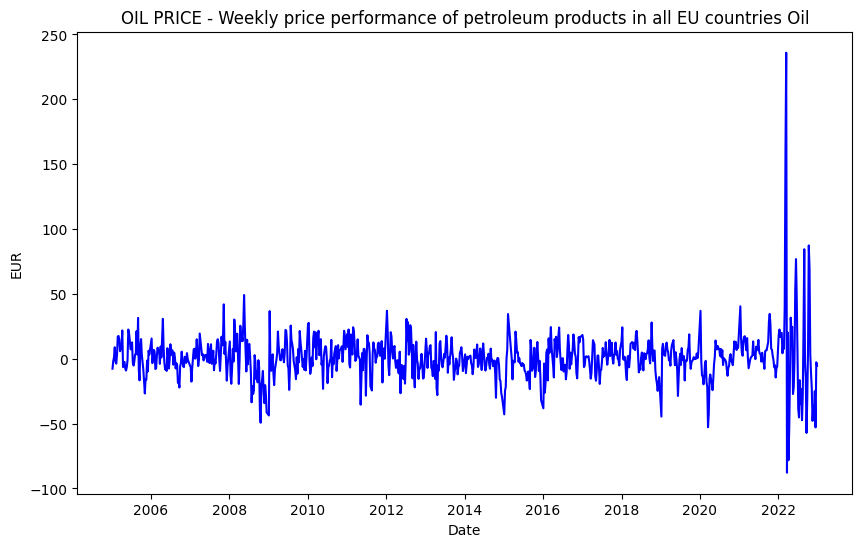

In [60]:
#Plot original OIL Price Timeseries

plt.figure(figsize=(10,6))
orig = plt.plot(dff, color='blue',label='Original')

plt.title('OIL PRICE - Weekly price performance of petroleum products in all EU countries Oil')
plt.xlabel('Date')
plt.ylabel('EUR')

plt.show(block=False)

In [47]:
dfp = df[['Date','Diesel']]
dfp = dfp.set_index(dfp.Date)
dfp.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',dff.dtypes)
dfp.head()

Column datatypes= 
 Dperformance_1    float64
dtype: object


,Diesel
Date,
2005-01-03,909.06
2005-01-10,901.38
2005-01-17,899.68
2005-01-24,900.77
2005-01-31,909.60


In [49]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 890 entries, 2005-01-03 to 2022-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Diesel  890 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


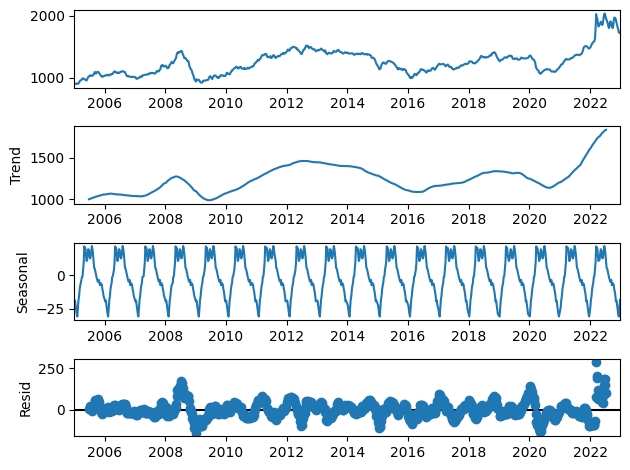

In [50]:
# We are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns
# dfp.info()
decomposition = sm.tsa.seasonal_decompose(dfp, model='additive', period=49)
fig = decomposition.plot()

In [65]:
model = ARIMA(dff, order=(2, 1, 2), freq = 'W')
results_ARIMA = model.fit(disp=-1)

plt.xlabel('Years')
plt.plot(dff,color= 'blue', label='Orignal (diff/log transformed)')
plt.plot(results_ARIMA.fittedvalues, color = 'red', label='ARIMA Model')
plt.title('The Combined ARIMA(p,d,q) Model')
plt.legend()

ValueError: ignored

---  
If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, we should create lag features for seven days.

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features

In [21]:
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)
data['lag_6'] = data['Close'].shift(6)
data['lag_7'] = data['Close'].shift(7)

dataX = data[['Date', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Close']]
dataX.head(10)

KeyError: ignored

---  
### **Rolling Window** Features  
How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.  

We will select a window size, take the average of the values in the window, and use it as a feature.

In [ ]:
# calcualting rolling mean for a window of 4 weeks
data['Drolling_mean4'] = data['Diesel'].rolling(window=4).mean()

dataX = data[['Date', 'Drolling_mean4', 'Diesel']]
dataX.head(10)

In [ ]:
import plotly.express as px
df= dataX[(dataX['Date'] > "2010-01-01") & (dataX['Date'] < "2019-12-31")]
#df.info()

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Drolling_mean4'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Rolling Means</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (800,2500))

# Display the plot
fig.show()

---  
### **Differencing** Time Series
Differencing is a method of transforming a time series dataset. Differencing is performed by subtracting the previous observation from the current observation.  

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

In [ ]:
dataZ = data[['Date', 'Diesel']]
dataZ['Ddiff1'] = dataZ['Diesel'].diff(periods=1)

dataZ.head()

In [ ]:
dataZ['Ddiff4'] = dataZ['Diesel'].diff(periods=4)
dataZ['Ddiff12'] = dataZ['Diesel'].diff(periods=12)

dataZ.head(10)

In [ ]:
import plotly.express as px
df= dataZ[(dataZ['Date'] > "2019-01-01") & (dataZ['Date'] < "2022-12-31")]

# Create Line plot
fig = px.line(df, x=df['Date'], y=['Diesel', 'Ddiff1','Ddiff4','Ddiff12'])


# Setup Layout
fig.update_layout(
   title="OIL PRICE - Weekly prices of petroleum products in all EU countries Oil<br><sup>EUROPEAN COMMISSION</sup><br><sup>with Differences</sup>",
    legend_title="Data Points",
    yaxis_title='EUR',
    width=1000, height=600,
    yaxis_range = (-500,600))

# Display the plot
fig.show()

---  
### **ADD ON:** Line or Bar Charts for Time Series?


In [ ]:
dataZ = data[['Date', 'Diesel']]
dataZ.info()
data.head()

In [ ]:
import matplotlib.pyplot as plt

dataZ = data[['Date', 'Diesel']]

plt.figure(figsize=(15, 8))
# as LINE chart
plt.plot(dataZ.Date, dataZ.Diesel)

# as BAR chart
# plt.bar(dataZ.Date, dataZ.Diesel)

plt.suptitle("Weekly prices of petroleum products in all EU countries Oil by the European Commission")
plt.title("DIESEL (1000 lt)")
plt.xlabel('Date')
plt.ylabel('EUR')

plt.show()

---   
### **ADD ON:** Visualizing time series data in [Heatmap](https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/) form


In [ ]:
!pip install calplot

In [ ]:
dataZ = data[['Date','Diesel']]
df= dataZ[(dataZ['Date'] > "2018-01-01") & (dataZ['Date'] < "2022-01-01")]
df.head()

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.info()

In [ ]:
y2018 = dataZ[(dataZ['Date'] > "2018-01-01") & (dataZ['Date'] < "2019-01-01")]['Diesel']
y2019 = dataZ[(dataZ['Date'] > "2019-01-01") & (dataZ['Date'] < "2020-01-01")]['Diesel']
y2020 = dataZ[(dataZ['Date'] > "2020-01-01") & (dataZ['Date'] < "2021-01-01")]['Diesel']

In [ ]:
y2018.info()
year = [y2018, y2019, y2020]

In [ ]:
year[1]

In [ ]:
import plotly.express as px

z = year

fig = px.imshow(z, text_auto=True, aspect="auto")
fig.show()

In [ ]:
import plotly.express as px
import xarray as xr
# Load xarray from dataset included in the xarray tutorial
airtemps = xr.tutorial.open_dataset('air_temperature').air.sel(lon=250.0)
fig = px.imshow(airtemps.T, color_continuous_scale='RdBu_r', origin='lower')
fig.show()

In [ ]:
!pip install calplot

In [ ]:
import calplot
fig1 = calplot.calplot(data = df['Diesel'],
                       cmap = 'jet',
                       figsize = (10, 5),
                       suptitle = "DIESEL - Weekly Price (in EUR)",
                       )

import pylab
pylab.savefig('diesel-heatmap.png')



---

